1. Intervalo das variáveis de [-100,100]
2. Quantidade de variáveis: 30
3. 10 variáveis
4. Coeficiente Cognitivo(C1): 2.0
5. Coeficiente Social(C2): 2.0
6. Peso de Inércia(W): Decréscimo Linear 0.9 a 0.4
7. a) Configuração 1:
   1. Tamanho da população: 30
   2. Numero de iterações: 500
8. b) Configuração 2:
   1. Tamanho da população: 50
   2. Numero de iterações: 1000
9. c) Configuração 3:
   1. Tamanho da população: 100
   2. Numero de iterações: 2000

Primeira Função: High Conditioned Elliptic Function

Segunda Função: Shifted and Rotated Weierstrass Function

In [1]:
%pip install mealpy --quiet

Note: you may need to restart the kernel to use updated packages.


## Optimize: Ackley Function
iter# 0: Fitness:11.10077, Position:[-3.29950413 -2.61834864], Velocity:10.000000000000002
iter# 1: Fitness:10.83538, Position:[-3.77073573 -2.99229835], Velocity:10.0
iter# 2: Fitness:10.61202, Position:[-3.93045184 -3.11904238], Velocity:10.0
iter# 3: Fitness:10.61202, Position:[-3.93045184 -3.11904238], Velocity:10.0
iter# 4: Fitness:10.61202, Position:[-3.93045184 -3.11904238], Velocity:10.0
iter# 5: Fitness:10.61202, Position:[-3.93045184 -3.11904238], Velocity:9.999999999999998
iter# 6: Fitness:10.32933, Position:[ 3.81412592 -0.59350854], Velocity:10.0
iter# 7: Fitness:10.05042, Position:[-3.18123268 -2.87703579], Velocity:9.708055132861988
iter# 8: Fitness:9.16944, Position:[ 3.25148575 -0.77715127], Velocity:9.999999999999998
iter# 9: Fitness:8.80053, Position:[ 3.19517622 -0.79553251], Velocity:9.999999999999998
iter# 10: Fitness:8.32275, Position:[-1.35932863 -2.28213716], Velocity:10.0
iter# 11: Fitness:8.02411, Position:[-1.29118476 -2.25989472

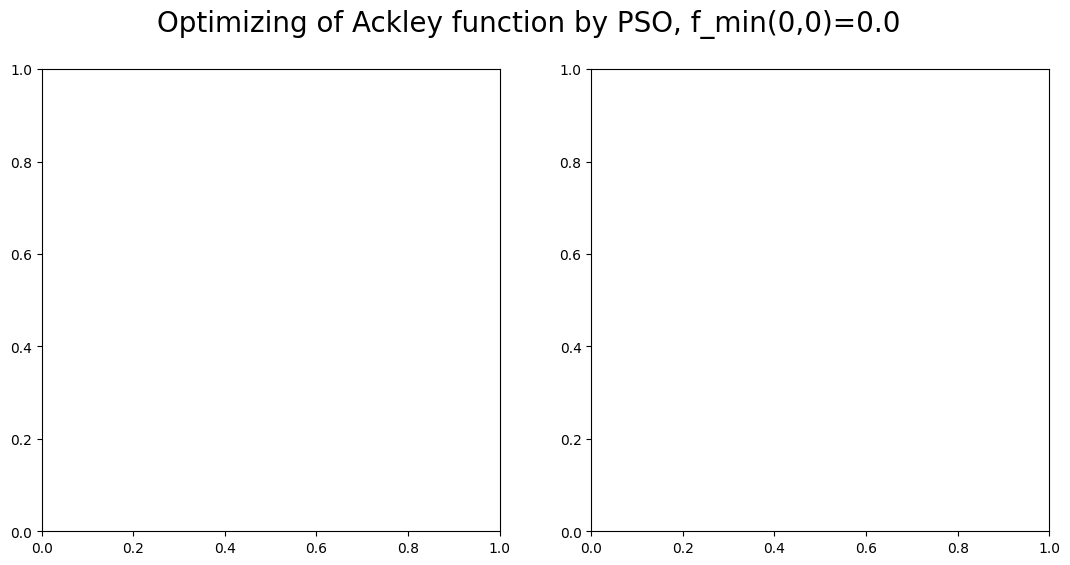

## Optimize: Rosenbrock Function
iter# 0: Fitness:5.74410, Position:[-1.39100784  1.9184152 ], Velocity:3.7984356195461157
iter# 1: Fitness:5.74410, Position:[-1.39100784  1.9184152 ], Velocity:10.000000000000002
iter# 2: Fitness:2.65870, Position:[-0.61947078  0.36476629], Velocity:7.349621254847178
iter# 3: Fitness:2.65870, Position:[-0.61947078  0.36476629], Velocity:3.615411561013968
iter# 4: Fitness:2.65870, Position:[-0.61947078  0.36476629], Velocity:2.91017385789989
iter# 5: Fitness:2.65870, Position:[-0.61947078  0.36476629], Velocity:2.280253526186772
iter# 6: Fitness:2.56531, Position:[-0.60145309  0.36430792], Velocity:1.491568941730158
iter# 7: Fitness:2.56486, Position:[-0.60055083  0.35509661], Velocity:0.9269114177176271
iter# 8: Fitness:2.42971, Position:[-0.53395055  0.31279873], Velocity:1.3634208402762744
iter# 9: Fitness:2.24188, Position:[-0.49380289  0.25405481], Velocity:0.5009335980188621
iter# 10: Fitness:2.12998, Position:[-0.44388175  0.17577441], Velocity:0

/Users/josericardo/Developer/Repos/UFG/heuristics/.conda/lib/python3.11/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


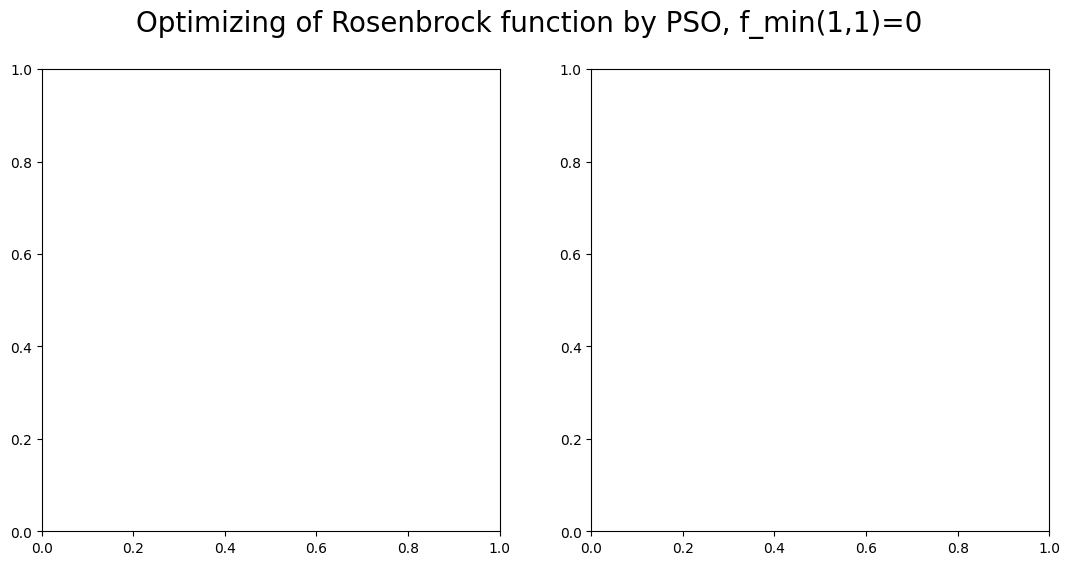

In [2]:
# =================================================================
#  Particle Swarm Optimization with Python and animated simulation
#
#  Reference:
#  - Particle swarm optimization - Wikipedia
#  https://en.wikipedia.org/wiki/Particle_swarm_optimization
#  - Test functions for optimization - Wikipedia
#  https://en.wikipedia.org/wiki/Test_functions_for_optimization
# =================================================================

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import animation
import os


def ackley_fun(x):
    """Ackley function
    Domain: -32 < xi < 32
    Global minimum: f_min(0,..,0)=0
    """
    return (
        -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2)))
        - np.exp(0.5 * (np.cos(np.pi * 2 * x[0]) + np.cos(np.pi * 2 * x[1])))
        + np.exp(1)
        + 20
    )


def rosenbrock_fun(x):
    """Rosenbrock function
    Domain: -5 < xi < 5
    Global minimum: f_min(1,..,1)=0
    """
    return 100 * (x[1] - x[0] ** 2) ** 2 + (x[0] - 1) ** 2


def pso(
    func,
    bounds,
    swarm_size=10,
    inertia=0.5,
    pa=0.8,
    ga=0.9,
    max_vnorm=10,
    num_iters=100,
    verbose=False,
    func_name=None,
):
    """Particle Swarm Optimization (PSO)
    # Arguments
        func: function to be optimized
        bounds: list, bounds of each dimension
        swarm_size: int, the population size of the swarm
        inertia: float, coefficient of momentum
        pa: float, personal acceleration
        ga: float, global acceleration
        max_vnorm: max velocity norm
        num_iters: int, the number of iterations
        verbose: boolean, whether to print results or not
        func_name: the name of object function to optimize

    # Returns
        history: history of particles and global bests
    """
    bounds = np.array(bounds)
    assert np.all(
        bounds[:, 0] < bounds[:, 1]
    )  # each boundaries have to satisfy this condition
    dim = len(bounds)
    X = np.random.rand(swarm_size, dim)  # range:0~1, domain:(swarm_size,dim)
    print("## Optimize:", func_name)

    def clip_by_norm(x, max_norm):
        norm = np.linalg.norm(x)
        return x if norm <= max_norm else x * max_norm / norm

    # --- step 1 : Initialize all particle randomly in the search-space
    particles = X * (bounds[:, 1] - bounds[:, 0]) + bounds[:, 0]
    velocities = X * (bounds[:, 1] - bounds[:, 0]) + bounds[:, 0]
    personal_bests = np.copy(particles)
    personal_best_fitness = [np.inf for p in particles]  # np.inf
    # global_best_idx = -1 # np.inf
    # global_best = [np.inf, np.inf] # np.inf or particles[global_best_idx]
    # global_best_fitness = np.inf # func(global_best)
    global_best_idx = np.argmin(personal_best_fitness)
    global_best = personal_bests[global_best_idx]
    global_best_fitness = func(global_best)
    history = {
        "particles": [],
        "global_best_fitness": [],
        "global_best": [[np.inf, np.inf] for i in range(num_iters)],
        "obj_func": func_name,
    }

    # --- step 2 : Iteration starts
    for i in range(num_iters):
        history["particles"].append(particles)
        history["global_best_fitness"].append(global_best_fitness)
        # history['global_best'].append(global_best) # seems not working
        history["global_best"][i][0] = global_best[0]
        history["global_best"][i][1] = global_best[1]

        if verbose:
            print("iter# {}:".format(i), end="")
        # --- step 3 : Evaluate current swarm
        # personal best
        for p_i in range(swarm_size):
            fitness = func(particles[p_i])
            if fitness < personal_best_fitness[p_i]:
                personal_bests[p_i] = particles[p_i]  # particle
                personal_best_fitness[p_i] = fitness  # its fitness

        # global best
        if np.min(personal_best_fitness) < global_best_fitness:
            global_best_idx = np.argmin(personal_best_fitness)
            global_best = personal_bests[global_best_idx]
            global_best_fitness = func(global_best)

        # --- step 4 : Calculate the acceleration and momentum
        m = inertia * velocities
        acc_local = pa * np.random.rand() * (personal_bests - particles)
        acc_global = ga * np.random.rand() * (global_best - particles)

        # --- step 5 : Update the velocities
        velocities = m + acc_local + acc_global
        velocities = clip_by_norm(velocities, max_vnorm)

        # --- step 6 : Update the position of particles
        particles = particles + velocities

        # logging
        if verbose:
            print(
                " Fitness:{:.5f}, Position:{}, Velocity:{}".format(
                    global_best_fitness, global_best, np.linalg.norm(velocities)
                )
            )

    return history


def visualizeHistory2D(
    func=None,
    history=None,
    bounds=None,
    minima=None,
    func_name="",
    save2mp4=False,
    save2gif=False,
):
    """Visualize the process of optimizing
    # Arguments
        func: object function
        history: dict, object returned from pso above
        bounds: list, bounds of each dimension
        minima: list, the exact minima to show in the plot
        func_name: str, the name of the object function
        save2mp4: bool, whether to save as mp4 or not
    """

    print("## Visualizing optimizing {}".format(func_name))
    assert len(bounds) == 2

    # define meshgrid according to given boundaries
    x = np.linspace(bounds[0][0], bounds[0][1], 50)
    y = np.linspace(bounds[1][0], bounds[1][1], 50)
    X, Y = np.meshgrid(x, y)
    Z = np.array([func([x, y]) for x, y in zip(X, Y)])

    # initialize figure
    fig = plt.figure(figsize=(13, 6))
    ax1 = fig.add_subplot(121, facecolor="w")
    ax2 = fig.add_subplot(122, facecolor="w")

    # animation callback function
    def animate(frame, history):
        # print('current frame:',frame)
        ax1.cla()
        ax1.set_xlabel("X1")
        ax1.set_ylabel("X2")
        ax1.set_title(
            "{}|iter={}|Gbest=({:.5f},{:.5f})".format(
                func_name,
                frame + 1,
                history["global_best"][frame][0],
                history["global_best"][frame][1],
            )
        )
        ax1.set_xlim(bounds[0][0], bounds[0][1])
        ax1.set_ylim(bounds[1][0], bounds[1][1])
        ax2.set_xlabel("Iteration")
        ax2.set_ylabel("Fitness")
        ax2.set_title(
            "Minima Value Plot|Population={}|MinVal={:}".format(
                len(history["particles"][0]), history["global_best_fitness"][frame]
            )
        )
        ax2.set_xlim(2, len(history["global_best_fitness"]))
        ax2.set_ylim(10e-16, 10e0)
        ax2.set_yscale("log")

        # data to be plot
        data = history["particles"][frame]
        global_best = np.array(history["global_best_fitness"])

        # contour and global minimum
        contour = ax1.contour(X, Y, Z, levels=50, cmap="magma")
        ax1.plot(minima[0], minima[1], marker="o", color="black")

        # plot particles
        ax1.scatter(data[:, 0], data[:, 1], marker="x", color="black")
        if frame > 1:
            for i in range(len(data)):
                ax1.plot(
                    [history["particles"][frame - n][i][0] for n in range(2, -1, -1)],
                    [history["particles"][frame - n][i][1] for n in range(2, -1, -1)],
                )
        elif frame == 1:
            for i in range(len(data)):
                ax1.plot(
                    [history["particles"][frame - n][i][0] for n in range(1, -1, -1)],
                    [history["particles"][frame - n][i][1] for n in range(1, -1, -1)],
                )

        # plot current global best
        x_range = np.arange(1, frame + 2)
        ax2.plot(x_range, global_best[0 : frame + 1])

    # title of figure
    fig.suptitle(
        "Optimizing of {} function by PSO, f_min({},{})={}".format(
            func_name.split()[0], minima[0], minima[1], func(minima)
        ),
        fontsize=20,
    )

    ani = animation.FuncAnimation(
        fig,
        animate,
        fargs=(history,),
        frames=len(history["particles"]),
        interval=250,
        repeat=False,
        blit=False,
    )

    ## TODO: Save animation as mp4
    if save2mp4:
        os.makedirs("mp4/", exist_ok=True)
        ani.save(
            "mp4/PSO_{}_population_{}.mp4".format(
                func_name.split()[0], len(history["particles"][0])
            ),
            writer="ffmpeg",
            dpi=100,
        )
        print("A mp4 video is saved at mp4/")
    elif save2gif:
        os.makedirs("gif/", exist_ok=True)
        ani.save(
            "gif/PSO_{}_population_{}.gif".format(
                func_name.split()[0], len(history["particles"][0])
            ),
            writer="imagemagick",
        )
        print("A gif video is saved at gif/")
    else:
        plt.show()


def experiment_suits():
    """Perform PSO Experiments
    Current test set:
        ['Rosenbrock Function', 'Ackley Function']
    """
    # settings
    save2mp4 = False
    save2gif = False
    obj_functions = [rosenbrock_fun, ackley_fun]
    obj_func_names = ["Rosenbrock Function", "Ackley Function"]
    each_boundaries = [
        [[-2, 2], [-2, 2]],
        [[-32, 32], [-32, 32]],
    ]
    global_minima = [
        [1, 1],
        [0, 0],
    ]
    swarmsizes_for_each_trial = [5, 15, 35, 50]
    num_iterations = 50

    # experiments
    for ofunc, ofname, bounds, g_minimum in zip(
        obj_functions, obj_func_names, each_boundaries, global_minima
    ):
        for swarm_size in swarmsizes_for_each_trial:
            # pso
            history = pso(
                func=ofunc,
                bounds=bounds,
                swarm_size=swarm_size,
                num_iters=num_iterations,
                verbose=0,
                func_name=ofname,
            )
            print(
                "global best:",
                history["global_best_fitness"][-1],
                ", global best position:",
                history["global_best"][-1],
            )
            # visualize
            visualizeHistory2D(
                func=ofunc,
                history=history,
                bounds=bounds,
                minima=g_minimum,
                func_name=ofname,
                save2mp4=save2mp4,
                save2gif=save2gif,
            )


## Perform experiment sets
# experiment_suits()


## If you want to manually execute
## Ackley func
history = pso(
    ackley_fun,
    bounds=[[-32, 32], [-32, 32]],
    swarm_size=30,
    inertia=0.5,
    num_iters=50,
    verbose=1,
    func_name="Ackley Function",
)
print(
    "global best:",
    history["global_best"][-1],
    ", global best position:",
    history["global_best"][-1],
)
visualizeHistory2D(
    func=ackley_fun,
    history=history,
    bounds=[[-32, 32], [-32, 32]],
    minima=[0, 0],
    func_name="Ackley Function",
    save2mp4=False,
    save2gif=False,
)

## Rosenbrock func
history = pso(
    rosenbrock_fun,
    bounds=[[-2, 2], [-2, 2]],
    swarm_size=30,
    inertia=0.5,
    num_iters=50,
    verbose=1,
    func_name="Rosenbrock Function",
)
print(
    "global best:",
    history["global_best_fitness"][-1],
    ", global best position:",
    history["global_best"][-1],
)
visualizeHistory2D(
    func=rosenbrock_fun,
    history=history,
    bounds=[[-2, 2], [-2, 2]],
    minima=[1, 1],
    func_name="Rosenbrock Function",
    save2mp4=False,
    save2gif=False,
)